In [2]:
import os
import shutil
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD

In [3]:
print(os.getcwd())

D:\Kuliah\Semester 6\PCD\Tugas Akhir


## SPLIT DATA VERSI 1.0

In [4]:
folder_path = '../Tugas Akhir/tes2/dataset'  # Path folder yang berisi gambar
training_path= '../Tugas Akhir/tes2/training'  # Path folder untuk data pelatihan
testing_path = '../Tugas Akhir/tes2/testing'  # Path folder untuk data pengujian
split_ratio = 0.8  # Rasio pembagian data (misalnya 0.8 berarti 80% pelatihan dan 20% pengujian)

# Membuat folder untuk data pelatihan dan pengujian jika belum ada
# os.makedirs(training, exist_ok=True)
# os.makedirs(testing, exist_ok=True)

# Mengambil daftar nama file gambar dalam folder
img_files = os.listdir(folder_path)

# Mengacak urutan file gambar
random.shuffle(img_files)

# # Menghitung jumlah data untuk pelatihan dan pengujian berdasarkan rasio pembagian
train_count = int(len(img_files) * split_ratio)
test_count = len(img_files) - train_count

# # # Memindahkan data gambar ke folder pelatihan dan pengujian
# for i, filename in enumerate(img_files):
#     src_path = os.path.join(folder_path, filename)
#     if i < train_count:
#         dst_path = os.path.join(training_path, filename)
#     else:
#         dst_path = os.path.join(testing_path, filename)
#     shutil.copy(src_path, dst_path)

print('Data berhasil dibagi menjadi folder pelatihan dan pengujian.')
print('Jumlah data pelatihan:', train_count)
print('Jumlah data pengujian:', test_count)

Data berhasil dibagi menjadi folder pelatihan dan pengujian.
Jumlah data pelatihan: 945
Jumlah data pengujian: 237


## VERSI 1.0 : SPLIT DULU BARU DIUBAH JADI ARRAY  (RGB SAJA)

In [26]:
#TRAINING IMAGE
#ekstrak fitur
train_img=[]     
for i in os.listdir(training_path):
    img=cv2.imread(os.path.join(training_path,i))  #gabungin setiap foto dari path training 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resize semua gambarnya

    train_img.append(resized)
train_img = np.array(train_img)

#ekstrak label
train_label=[]
for i in os.listdir(training_path):
    if i.split(" ")[0] == "underripe":
        train_label.append(0)
    elif i.split(" ")[0] =="ripe":
        train_label.append(1)
    elif i.split(" ")[0] == "overripe":
        train_label.append(2)
train_label = np.array(train_label)

In [27]:
print(train_img.shape)
print(train_label.shape)

(945, 120, 120, 3)
(945,)


In [6]:
#TESTING IMAGE
#ekstrak fitur
test_img=[]     
for i in os.listdir(testing_path):
    img=cv2.imread(os.path.join(testing_path,i))  #gabungin setiap foto dari path testing 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resize semua gambarnya

    test_img.append(resized)
test_img = np.array(test_img)

#ekstrak label
test_label=[]
for i in os.listdir(testing_path):
    if i.split(" ")[0] == "underripe":
        test_label.append(0)
    elif i.split(" ")[0] =="ripe":
        test_label.append(1)
    elif i.split(" ")[0] == "overripe":
        test_label.append(2)
test_label = np.array(test_label)

In [30]:
print(test_img.shape)
print(test_label.shape)

(237, 120, 120, 3)
(237,)


In [63]:
#DATA SPLITING
Xtrain, Xtest = train_img, test_img
Ytrain, Ytest = train_label, test_label

# Xtrain = Xtrain/255
# Xtest = Xtest/255

# #Make a flattened version for some of our models
# Xflat_train = Xtrain.reshape(Xtrain.shape[0], 120*120*3)
# Xflat_test = Xtest.reshape(Xtest.shape[0], 120*120*3)

print('Original Sizes:', Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
# print('Flattened:', Xflat_train.shape, Xflat_test.shape)

Original Sizes: (947, 120, 120, 3) (237, 120, 120, 3) (947,) (237,)


In [71]:
#Reshape
Xtr = Xtrain.reshape(947,43200)
#Reshape
Xts = Xtest.reshape(237,43200)

In [72]:
Xtr.shape

(947, 43200)

In [43]:
120*120*3

43200

In [73]:
#MODELING RF
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(Xtr,Ytrain)

RandomForestClassifier()

In [88]:
#MODELING SVM
from sklearn.svm import SVC
smodel=SVC()
smodel.fit(Xtr,Ytrain)

SVC()

In [89]:
#akurasinya svm
smodel.score(Xts,Ytest)

0.5611814345991561

In [74]:
#akurasinya rf
rmodel.score(Xts,Ytest)

0.5738396624472574

In [84]:
urutan = 3
prediksi = rmodel.predict(Xtest[urutan].reshape(1,-1))
if prediksi == 0:
    print("Belum Mateng")
elif prediksi == 1:
    print("Mateng")
elif prediksi == 2:
    print("Kematengan")



Kematengan


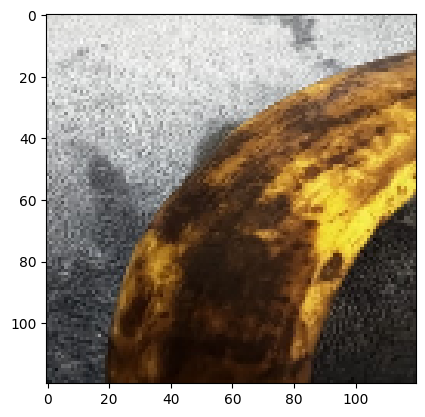

In [85]:
plt.imshow(Xtest[3])

## VERSI 1.1 : SPLIT DULU BARU DIUBAH JADI ARRAY  (RGB HA)

In [5]:
#TRAINING
train_loc = '../Tugas Akhir/tes2/training'
#ekstrak fitur
train_img1=[]     #list for features
for i in os.listdir(train_loc):
    img=cv2.imread(os.path.join(train_loc,i))  #joining the path of each image in the loop 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resizing all imgaes to reduce computation and also give each image a dimension
    train_img1.append(resized)
    
train_img2 = []  # list for features
for i in os.listdir(train_loc):
    img = cv2.imread(os.path.join(train_loc, i))  # joining the path of each image in the loop
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h_channel = img_hsv[:, :, 0]  # Accessing only the H (hue) channel
    resized=cv2.resize(h_channel,(120,120)) 
    train_img2.append(resized)
    
train_img3 = []  # list for features
for i in os.listdir(train_loc):
    img = cv2.imread(os.path.join(train_loc, i))  # joining the path of each image in the loop 
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    a_channel = img_lab[:, :, 1]  # Accessing only the a channel
    resized=cv2.resize(a_channel,(120,120)) 
    train_img3.append(resized)

train_img1 = np.array(train_img1)
train_img2 = np.array(train_img2)
train_img3 = np.array(train_img3)

train_fitur = np.empty((len(train_img1), 120, 120, 5), dtype=np.uint8)
train_fitur[:, :, :, :3] = train_img1[:, :, :, 2::-1]  # R, G, B channels from gambar_arr
train_fitur[:, :, :, 3] = train_img2  # H channel from gembor_arr
train_fitur[:, :, :, 4] = train_img3  # a channel from gember_arr

train_label=[]
for i in os.listdir(train_loc):
    if i.split(" ")[0] == "underripe":
        train_label.append(0)
    elif i.split(" ")[0] =="ripe":
        train_label.append(1)
    elif i.split(" ")[0] == "overripe":
        train_label.append(2)

In [6]:
test_loc = '../Tugas Akhir/tes2/testing'
#TESTING
#ekstrak fitur
test_img1=[]     #list for features
for i in os.listdir(test_loc):
    img=cv2.imread(os.path.join(test_loc,i))  #joining the path of each image in the loop 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resizing all imgaes to reduce computation and also give each image a dimension
    test_img1.append(resized)
    
test_img2 = []  # list for features
for i in os.listdir(test_loc):
    img = cv2.imread(os.path.join(test_loc, i))  # joining the path of each image in the loop
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h_channel = img_hsv[:, :, 0]  # Accessing only the H (hue) channel
    resized=cv2.resize(h_channel,(120,120)) 
    test_img2.append(resized)
    
test_img3 = []  # list for features
for i in os.listdir(test_loc):
    img = cv2.imread(os.path.join(test_loc, i))  # joining the path of each image in the loop 
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    a_channel = img_lab[:, :, 1]  # Accessing only the a channel
    resized=cv2.resize(a_channel,(120,120)) 
    test_img3.append(resized)

test_img1 = np.array(test_img1)
test_img2 = np.array(test_img2)
test_img3 = np.array(test_img3)

test_fitur = np.empty((len(test_img1), 120, 120, 5), dtype=np.uint8)
test_fitur[:, :, :, :3] = test_img1[:, :, :, 2::-1]  # R, G, B channels from gambar_arr
test_fitur[:, :, :, 3] = test_img2  # H channel from gembor_arr
test_fitur[:, :, :, 4] = test_img3  # a channel from gember_arr

test_label=[]
for i in os.listdir(test_loc):
    if i.split(" ")[0] == "underripe":
        test_label.append(0)
    elif i.split(" ")[0] =="ripe":
        test_label.append(1)
    elif i.split(" ")[0] == "overripe":
        test_label.append(2)

In [7]:
#DATA SPLITING
Xtrain, Xtest = train_fitur, test_fitur
Ytrain, Ytest = train_label, test_label

In [8]:
120*120*5

72000

In [10]:
#Reshape
Xtr = train_fitur.reshape(945,72000)
#Reshape
Xts = test_fitur.reshape(237,72000)

In [11]:
# Detail split data
print(train_fitur.shape)
print(test_fitur.shape)
print(Xts.shape)
print(Xtr.shape)

(945, 120, 120, 5)
(237, 120, 120, 5)
(237, 72000)
(945, 72000)


In [28]:
#MODELING RF
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier(n_estimators = 100)
rmodel.fit(Xtr,Ytrain)

RandomForestClassifier()

In [29]:
#akurasinya rf
rmodel.score(Xts,Ytest)

0.8734177215189873

Kematengan


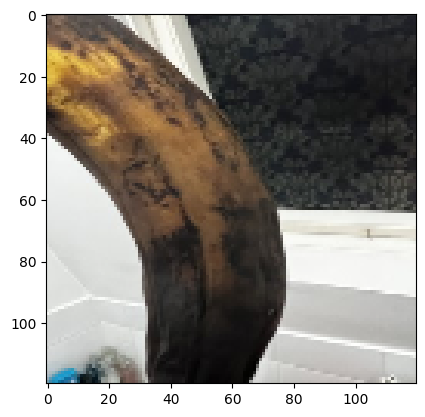

In [36]:
urutan = 10
prediksi = rmodel.predict(Xts[urutan].reshape(1,-1))
if prediksi == 0:
    print("Belum Mateng")
elif prediksi == 1:
    print("Mateng")
elif prediksi == 2:
    print("Kematengan")

plt.imshow(test_img1[urutan])
plt.show()

In [40]:
# Make predictions for the test set
y_pred_test = rmodel.predict(Xts)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix = confusion_matrix(Ytest, y_pred_test)
confusion_matrix

array([[67,  6,  2],
       [ 9, 51,  4],
       [ 0,  9, 89]], dtype=int64)

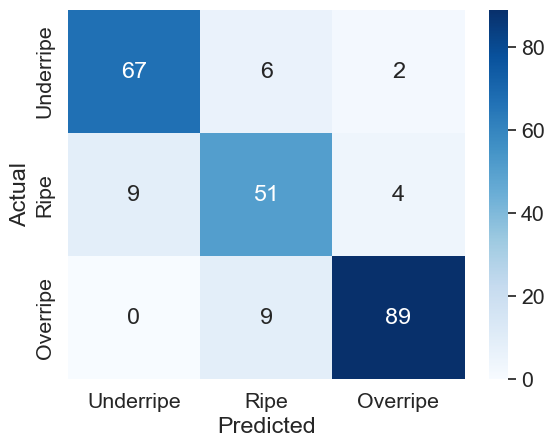

In [48]:
import seaborn as sns

# Membuat label untuk kelas
labels = ['Underripe', 'Ripe', 'Overripe']

# Membuat heat map menggunakan seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan plot
plt.show()


In [59]:
# Menghitung TP, FP, FN, TN untuk setiap kelas
TP = np.diag(confusion_matrix)
FP = np.sum(confusion_matrix, axis=0) - TP
FN = np.sum(confusion_matrix, axis=1) - TP
TN = np.sum(confusion_matrix) - (TP + FP + FN)

# Menghitung Precision, Recall, dan F1-measure untuk setiap kelas
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_measure = 2 * (precision * recall) / (precision + recall)

# Menampilkan hasil dalam bentuk tabel
print("Class\t\t| TP\t| FP\t| Precision\t| Recall\t| F1-score")
print("------------------------------------------------------------------------")
for i in range(len(TP)):
    if i == 0: z = "Belum matang"
    elif i == 1: z = "Matang \t"
    elif i == 2: z = "Kematangan"
    print(f"{z}\t| {TP[i]}\t| {FP[i]}\t| {precision[i]:.2f}\t\t| {recall[i]:.2f}\t\t| {f1_measure[i]:.2f}")


Class		| TP	| FP	| Precision	| Recall	| F1-score
------------------------------------------------------------------------
Belum matang	| 67	| 9	| 0.88		| 0.89		| 0.89
Matang 		| 51	| 15	| 0.77		| 0.80		| 0.78
Kematangan	| 89	| 6	| 0.94		| 0.91		| 0.92


## VERSI 2.1 : UBAH JADI ARRAY DULU BARU DI SPLIT (RGB H A)

In [ ]:
#Kodingannya mulai dari sini

In [152]:
loc = r'D:/Kuliah/Semester 6/PCD/Tugas Akhir/tes1/dataset'

In [153]:
label=[]
for i in os.listdir(loc):
    if i.split(" ")[0] == "underripe":
        label.append(0)
    elif i.split(" ")[0] =="ripe":
        label.append(1)
    elif i.split(" ")[0] == "overripe":
        label.append(2)
label = np.array(label)

In [154]:
# ini coretan
images = []
for file_name in os.listdir(loc):
    # Memeriksa apakah file memiliki ekstensi .jpg atau .png
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        file_path = os.path.join(loc, file_name)
        img = cv2.imread(file_path, cv2.IMREAD_COLOR)
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
images = np.array(images)

C:\Users\ACER\AppData\Local\Temp\ipykernel_14800\216238171.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [150]:
print(len(images))
print(len(label))

1184
1184


In [155]:
#ekstrak fitur
gambar=[]     #list for features
for i in os.listdir(loc):
    img=cv2.imread(os.path.join(loc,i))  #joining the path of each image in the loop 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resizing all imgaes to reduce computation and also give each image a dimension
    

    gambar.append(resized)

In [156]:
gembor = []  # list for features
for i in os.listdir(loc):
    img = cv2.imread(os.path.join(loc, i))  # joining the path of each image in the loop
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h_channel = img_hsv[:, :, 0]  # Accessing only the H (hue) channel

    gembor.append(h_channel)

In [157]:
gember = []  # list for features
for i in os.listdir(loc):
    img = cv2.imread(os.path.join(loc, i))  # joining the path of each image in the loop 
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    a_channel = img_lab[:, :, 1]  # Accessing only the a channel

    gember.append(a_channel)

In [158]:
import numpy as np

gambar_arr = []
gembor_arr = []
gember_arr = []

for i in range(len(gambar)):
    img = gambar[i]
    img_h = gembor[i]
    img_a = gember[i]
    
    # Resize gambar, gembor, dan gember ke ukuran yang sama
    img_resized = cv2.resize(img, (120, 120))
    img_h_resized = cv2.resize(img_h, (120, 120))
    img_a_resized = cv2.resize(img_a, (120, 120))
    
    gambar_arr.append(img_resized)
    gembor_arr.append(img_h_resized)
    gember_arr.append(img_a_resized)

gambar_arr = np.array(gambar_arr)
gembor_arr = np.array(gembor_arr)
gember_arr = np.array(gember_arr)

fitur = np.empty((len(gambar_arr), 120, 120, 5), dtype=np.uint8)
fitur[:, :, :, :3] = gambar_arr[:, :, :, 2::-1]  # R, G, B channels from gambar_arr
fitur[:, :, :, 3] = gembor_arr  # H channel from gembor_arr
fitur[:, :, :, 4] = gember_arr  # a channel from gember_arr

In [79]:
#Banyak fitur dan label
print(fitur.shape)
print(label.shape)

(1184, 120, 120, 5)
(1184,)


In [65]:
120*120*5

72000

In [159]:
#definisikan X dan Y part 2
X = np.array(fitur)
Y = np.array(label)
X = X.reshape(1184,72000)

In [160]:
#split dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [161]:
#Bikin model randomforest
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier(n_estimators = 100)
rmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [162]:
#akurasinya #2
rmodel.score(xtest,ytest)

0.8185654008438819

In [70]:
# detail split data
# train = 947
# test = 237
print(xtrain.shape)
print(xtest.shape)

(947, 72000)
(237, 72000)


In [72]:
urutan = 10
prediksi = rmodel.predict(xtest[urutan].reshape(1,-1))
if prediksi == 0:
    print("Belum Mateng")
elif prediksi == 1:
    print("Mateng")
elif prediksi == 2:
    print("Kematengan")

Mateng


## VERSI 3.0 Menggunakan Mean disetiap nilai cenel

In [163]:
folder_path = '../Tugas Akhir/tes2/dataset'  # Path folder yang berisi gambar
training_path= '../Tugas Akhir/tes2/training'  # Path folder untuk data pelatihan
testing_path = '../Tugas Akhir/tes2/testing'  # Path folder untuk data pengujian

In [164]:
#TRAINING IMAGE
#ekstrak fitur
tr_mean_R = []
tr_mean_B = []
tr_mean_G = []
tr_mean_H = []
tr_mean_S = []
tr_mean_V = []
tr_mean_L = []
tr_mean_a = []
tr_mean_b = []

#EKSTRAK RGB
for i in os.listdir(training_path):
    img=cv2.imread(os.path.join(training_path,i))  #gabungin setiap foto dari path training 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img=cv2.resize(img,(120,120))   #resize semua gambarnya
    tr_avg_R = np.mean(img[:, :, 2])
    tr_avg_G = np.mean(img[:, :, 1])
    tr_avg_B = np.mean(img[:, :, 0])
    tr_mean_R.append(tr_avg_R)
    tr_mean_G.append(tr_avg_G)
    tr_mean_B.append(tr_avg_B)  
tr_mean_R = np.array(tr_mean_R)
tr_mean_G = np.array(tr_mean_G)
tr_mean_B = np.array(tr_mean_B)

#EKSTRAK HSV
for i in os.listdir(training_path):
    img=cv2.imread(os.path.join(training_path,i))  #gabungin setiap foto dari path training 
    imghsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    imghsv=cv2.resize(imghsv,(120,120))   #resize semua gambarnya
    tr_avg_H = np.mean(img[:, :, 0])
    tr_avg_S = np.mean(img[:, :, 1])
    tr_avg_V = np.mean(img[:, :, 2])
    tr_mean_H.append(tr_avg_H)
    tr_mean_S.append(tr_avg_S)
    tr_mean_V.append(tr_avg_V)  
tr_mean_H = np.array(tr_mean_H)
tr_mean_S = np.array(tr_mean_S)
tr_mean_V = np.array(tr_mean_V)

#EKSTRAK Lab
for i in os.listdir(training_path):
    img=cv2.imread(os.path.join(training_path,i))  #gabungin setiap foto dari path training 
    imglab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    imglab=cv2.resize(imglab,(120,120))   #resize semua gambarnya
    tr_avg_L = np.mean(img[:, :, 0])
    tr_avg_a = np.mean(img[:, :, 1])
    tr_avg_b = np.mean(img[:, :, 2])
    tr_mean_L.append(tr_avg_L)
    tr_mean_a.append(tr_avg_a)
    tr_mean_b.append(tr_avg_b)  
tr_mean_L = np.array(tr_mean_L)
tr_mean_a = np.array(tr_mean_a)
tr_mean_b = np.array(tr_mean_b)

#ekstrak label
train_label=[]
for i in os.listdir(training_path):
    if i.split(" ")[0] == "underripe":
        train_label.append(0)
    elif i.split(" ")[0] =="ripe":
        train_label.append(1)
    elif i.split(" ")[0] == "overripe":
        train_label.append(2)
train_label = np.array(train_label)

In [165]:
#Dibikin dataframe
import pandas as pd
DataframeTr = pd.DataFrame()
DataframeTr['Label'] = train_label
DataframeTr['mean_R'] = tr_mean_R
DataframeTr['mean_G'] = tr_mean_G
DataframeTr['mean_B'] = tr_mean_B
DataframeTr['mean_H'] = tr_mean_H
DataframeTr['mean_S'] = tr_mean_S
DataframeTr['mean_V'] = tr_mean_V
DataframeTr['mean_L'] = tr_mean_L
DataframeTr['mean_a'] = tr_mean_a
DataframeTr['mean_b'] = tr_mean_b

In [166]:
DataframeTr

,Label,mean_R,mean_G,mean_B,mean_H,mean_S,mean_V,mean_L,mean_a,mean_b
0,2,134.798056,139.753194,145.931181,134.903384,139.859221,146.034415,134.903384,139.859221,146.034415
1,2,100.593819,110.971389,119.214583,100.680827,111.048557,119.294443,100.680827,111.048557,119.294443
2,2,101.401944,107.086319,112.265417,101.474474,107.149306,112.337891,101.474474,107.149306,112.337891
3,2,89.585208,95.478681,100.848194,89.669226,95.557454,100.932183,89.669226,95.557454,100.932183
4,2,91.824722,78.282153,76.967014,92.062306,78.510976,77.195913,92.062306,78.510976,77.195913
...,...,...,...,...,...,...,...,...,...,...
940,0,109.405417,142.006250,152.755764,109.433232,142.046233,152.793674,109.433232,142.046233,152.793674
941,0,88.357639,113.505556,119.748958,88.401675,113.530210,119.774911,88.401675,113.530210,119.774911
942,0,86.973819,120.599097,126.864514,87.054678,120.680619,126.942916,87.054678,120.680619,126.942916
943,0,93.959792,126.125000,133.201667,93.998445,126.148239,133.220685,93.998445,126.148239,133.220685


In [167]:
#TESTING IMAGE
#ekstrak fitur
ts_mean_R = []
ts_mean_B = []
ts_mean_G = []
ts_mean_H = []
ts_mean_S = []
ts_mean_V = []
ts_mean_L = []
ts_mean_a = []
ts_mean_b = []

#EKSTRAK RGB
for i in os.listdir(testing_path):
    img=cv2.imread(os.path.join(testing_path,i))  #gabungin setiap foto dari path training 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img=cv2.resize(img,(120,120))   #resize semua gambarnya
    ts_avg_R = np.mean(img[:, :, 2])
    ts_avg_G = np.mean(img[:, :, 1])
    ts_avg_B = np.mean(img[:, :, 0])
    ts_mean_R.append(ts_avg_R)
    ts_mean_G.append(ts_avg_G)
    ts_mean_B.append(ts_avg_B)  
ts_mean_R = np.array(ts_mean_R)
ts_mean_G = np.array(ts_mean_G)
ts_mean_B = np.array(ts_mean_B)

#EKSTRAK HSV
for i in os.listdir(testing_path):
    img=cv2.imread(os.path.join(testing_path,i))  #gabungin setiap foto dari path training 
    imghsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    imghsv=cv2.resize(imghsv,(120,120))   #resize semua gambarnya
    ts_avg_H = np.mean(img[:, :, 0])
    ts_avg_S = np.mean(img[:, :, 1])
    ts_avg_V = np.mean(img[:, :, 2])
    ts_mean_H.append(ts_avg_H)
    ts_mean_S.append(ts_avg_S)
    ts_mean_V.append(ts_avg_V)  
ts_mean_H = np.array(ts_mean_H)
ts_mean_S = np.array(ts_mean_S)
ts_mean_V = np.array(ts_mean_V)

#EKSTRAK Lab
for i in os.listdir(testing_path):
    img=cv2.imread(os.path.join(testing_path,i))  #gabungin setiap foto dari path training 
    imglab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    imglab=cv2.resize(imglab,(120,120))   #resize semua gambarnya
    ts_avg_L = np.mean(img[:, :, 0])
    ts_avg_a = np.mean(img[:, :, 1])
    ts_avg_b = np.mean(img[:, :, 2])
    ts_mean_L.append(ts_avg_L)
    ts_mean_a.append(ts_avg_a)
    ts_mean_b.append(ts_avg_b)  
ts_mean_L = np.array(ts_mean_L)
ts_mean_a = np.array(ts_mean_a)
ts_mean_b = np.array(ts_mean_b)

#ekstrak label
test_label=[]
for i in os.listdir(testing_path):
    if i.split(" ")[0] == "underripe":
        test_label.append(0)
    elif i.split(" ")[0] =="ripe":
        test_label.append(1)
    elif i.split(" ")[0] == "overripe":
        test_label.append(2)
test_label = np.array(test_label)

In [168]:
#Dibikin dataframe
import pandas as pd
DataframeTs = pd.DataFrame()
DataframeTs['Label'] = test_label
DataframeTs['mean_R'] = ts_mean_R
DataframeTs['mean_G'] = ts_mean_G
DataframeTs['mean_B'] = ts_mean_B
DataframeTs['mean_H'] = ts_mean_H
DataframeTs['mean_S'] = ts_mean_S
DataframeTs['mean_V'] = ts_mean_V
DataframeTs['mean_L'] = ts_mean_L
DataframeTs['mean_a'] = ts_mean_a
DataframeTs['mean_b'] = ts_mean_b

In [169]:
DataframeTs

,Label,mean_R,mean_G,mean_B,mean_H,mean_S,mean_V,mean_L,mean_a,mean_b
0,2,53.074514,100.913889,133.522292,53.143374,100.988598,133.602024,53.143374,100.988598,133.602024
1,2,103.214653,110.547917,120.978611,103.310762,110.635276,121.056609,103.310762,110.635276,121.056609
2,2,99.224514,103.605694,105.350208,99.257297,103.656141,105.397805,99.257297,103.656141,105.397805
3,2,84.806944,71.548125,69.143472,84.956570,71.699237,69.296559,84.956570,71.699237,69.296559
4,2,49.454722,92.945625,122.135556,49.541522,93.026910,122.221806,49.541522,93.026910,122.221806
...,...,...,...,...,...,...,...,...,...,...
232,0,64.059792,115.739931,127.749236,64.129114,115.803069,127.818025,64.129114,115.803069,127.818025
233,0,74.184583,81.148056,83.353264,74.288981,81.253120,83.455259,74.288981,81.253120,83.455259
234,0,115.776806,125.402292,122.882083,115.859899,125.484266,122.967104,115.859899,125.484266,122.967104
235,0,106.673750,122.922917,128.133194,106.797418,123.047074,128.254937,106.797418,123.047074,128.254937


In [170]:
#Misahin fitur dan label untuk bangun model
xtrain = DataframeTr[["mean_R","mean_G","mean_B","mean_H","mean_a"]]
ytrain = DataframeTr[['Label']]
xtest = DataframeTs[["mean_R","mean_G","mean_B","mean_H","mean_a"]]
ytest = DataframeTs[['Label']]


In [177]:
#Bikin model randomforest
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier(n_estimators=100)
rmodel.fit(xtrain,ytrain)

C:\Users\ACER\AppData\Local\Temp\ipykernel_14800\2246014423.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rmodel.fit(xtrain,ytrain)


RandomForestClassifier()

In [178]:
#akurasinya #2
rmodel.score(xtest,ytest)

0.6413502109704642

## VERSI 4.0 Coba pakai hasil segmentasi

In [35]:
folder_path = '../Tugas Akhir/tes2/segmented/SegmentedByPy/Segmented'  # Path folder yang berisi gambar
training_path= '../Tugas Akhir/tes2/segmented/SegmentedByPy/training'  # Path folder untuk data pelatihan
testing_path = '../Tugas Akhir/tes2/segmented/SegmentedByPy/testing'  # Path folder untuk data pengujian
split_ratio = 0.8  # Rasio pembagian data (misalnya 0.8 berarti 80% pelatihan dan 20% pengujian)

# Membuat folder untuk data pelatihan dan pengujian jika belum ada
# os.makedirs(training, exist_ok=True)
# os.makedirs(testing, exist_ok=True)

# Mengambil daftar nama file gambar dalam folder
img_files = os.listdir(folder_path)

# Mengacak urutan file gambar
random.shuffle(img_files)

# # Menghitung jumlah data untuk pelatihan dan pengujian berdasarkan rasio pembagian
train_count = int(len(img_files) * split_ratio)
test_count = len(img_files) - train_count

# # Memindahkan data gambar ke folder pelatihan dan pengujian
for i, filename in enumerate(img_files):
    src_path = os.path.join(folder_path, filename)
    if i < train_count:
        dst_path = os.path.join(training_path, filename)
    else:
        dst_path = os.path.join(testing_path, filename)
    shutil.copy(src_path, dst_path)

print('Data berhasil dibagi menjadi folder pelatihan dan pengujian.')
print('Jumlah data pelatihan:', train_count)
print('Jumlah data pengujian:', test_count)

Data berhasil dibagi menjadi folder pelatihan dan pengujian.
Jumlah data pelatihan: 948
Jumlah data pengujian: 238


In [36]:
labels=[]
for i in os.listdir(folder_path):
    if i.split(" ")[0] == "segmented_underripe":
        labels.append(0)
    elif i.split(" ")[0] =="segmented_ripe":
        labels.append(1)
    elif i.split(" ")[0] == "segmented_overripe":
        labels.append(2)
    else: 
        print(i)

In [37]:
#TRAINING
train_loc = '../Tugas Akhir/tes2/segmented/SegmentedByPy/training'
#ekstrak fitur
train_img1=[]     #list for features
for i in os.listdir(train_loc):
    img=cv2.imread(os.path.join(train_loc,i))  #joining the path of each image in the loop 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resizing all imgaes to reduce computation and also give each image a dimension
    train_img1.append(resized)
    
train_img2 = []  # list for features
for i in os.listdir(train_loc):
    img = cv2.imread(os.path.join(train_loc, i))  # joining the path of each image in the loop
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h_channel = img_hsv[:, :, 0]  # Accessing only the H (hue) channel
    resized=cv2.resize(h_channel,(120,120)) 
    train_img2.append(resized)
    
train_img3 = []  # list for features
for i in os.listdir(train_loc):
    img = cv2.imread(os.path.join(train_loc, i))  # joining the path of each image in the loop 
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    a_channel = img_lab[:, :, 1]  # Accessing only the a channel
    resized=cv2.resize(a_channel,(120,120)) 
    train_img3.append(resized)

train_img1 = np.array(train_img1)
train_img2 = np.array(train_img2)
train_img3 = np.array(train_img3)

train_fitur = np.empty((len(train_img1), 120, 120, 5), dtype=np.uint8)
train_fitur[:, :, :, :3] = train_img1[:, :, :, 2::-1]  # R, G, B channels from gambar_arr
train_fitur[:, :, :, 3] = train_img2  # H channel from gembor_arr
train_fitur[:, :, :, 4] = train_img3  # a channel from gember_arr

train_label=[]
for i in os.listdir(train_loc):
    if i.split(" ")[0] == "segmented_underripe":
        train_label.append(0)
    elif i.split(" ")[0] =="segmented_ripe":
        train_label.append(1)
    elif i.split(" ")[0] == "segmented_overripe":
        train_label.append(2)
train_label = np.array(train_label)

In [38]:
test_loc = '../Tugas Akhir/tes2/segmented/SegmentedByPy/testing'
#TESTING
#ekstrak fitur
test_img1=[]     #list for features
for i in os.listdir(test_loc):
    img=cv2.imread(os.path.join(test_loc,i))  #joining the path of each image in the loop 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resizing all imgaes to reduce computation and also give each image a dimension
    test_img1.append(resized)
    
test_img2 = []  # list for features
for i in os.listdir(test_loc):
    img = cv2.imread(os.path.join(test_loc, i))  # joining the path of each image in the loop
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h_channel = img_hsv[:, :, 0]  # Accessing only the H (hue) channel
    resized=cv2.resize(h_channel,(120,120)) 
    test_img2.append(resized)
    
test_img3 = []  # list for features
for i in os.listdir(test_loc):
    img = cv2.imread(os.path.join(test_loc, i))  # joining the path of each image in the loop 
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    a_channel = img_lab[:, :, 1]  # Accessing only the a channel
    resized=cv2.resize(a_channel,(120,120)) 
    test_img3.append(resized)

test_img1 = np.array(test_img1)
test_img2 = np.array(test_img2)
test_img3 = np.array(test_img3)

test_fitur = np.empty((len(test_img1), 120, 120, 5), dtype=np.uint8)
test_fitur[:, :, :, :3] = test_img1[:, :, :, 2::-1]  # R, G, B channels from gambar_arr
test_fitur[:, :, :, 3] = test_img2  # H channel from gembor_arr
test_fitur[:, :, :, 4] = test_img3  # a channel from gember_arr

test_label=[]
for i in os.listdir(test_loc):
    if i.split(" ")[0] == "segmented_underripe":
        test_label.append(0)
    elif i.split(" ")[0] =="segmented_ripe":
        test_label.append(1)
    elif i.split(" ")[0] == "segmented_overripe":
        test_label.append(2)
    else: print(i)
test_label = np.array(test_label)

In [39]:
#DATA SPLITING
Xtrain, Xtest = train_fitur, test_fitur
Ytrain, Ytest = train_label, test_label

In [40]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(948, 120, 120, 5)
(238, 120, 120, 5)
(948,)
(238,)


In [41]:
#Reshape
Xtr = train_fitur.reshape(948,72000)
#Reshape
Xts = test_fitur.reshape(238,72000)

In [48]:
#MODELING RF
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier(n_estimators = 100)
rmodel.fit(Xtr,Ytrain)

RandomForestClassifier()

In [49]:
#akurasinya rf
rmodel.score(Xts,Ytest)

0.7184873949579832